
# **K-means Clustering Problem using Python**

---

### **Exercise 1: Data Exploration and Preprocessing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

*1. Load the Dataset*

In [2]:
df = pd.read_csv('customer_segmentation.csv')

*2. Data Exploration*

In [3]:
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [4]:
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


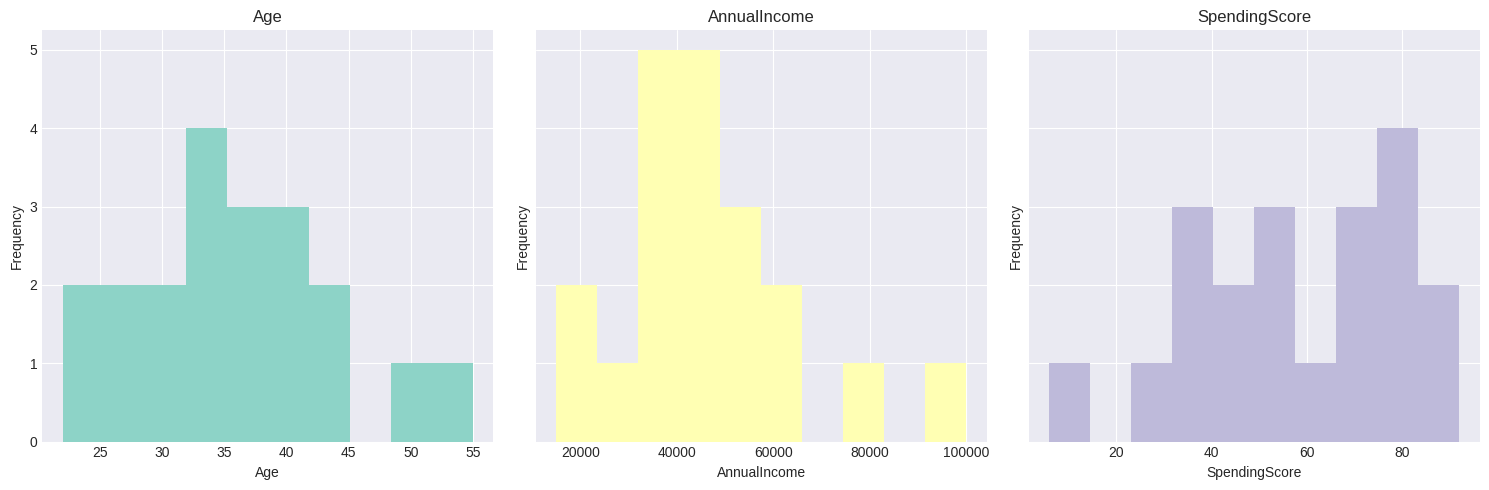

In [57]:
pastel_colors = sns.color_palette('Set3', n_colors=3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, column, color in zip(axs, ['Age', 'AnnualIncome', 'SpendingScore'], pastel_colors):
    df[column].hist(ax=ax, bins=10, color=color)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**3. Data Normalization**

In [58]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

In [7]:
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


### **Exercise 2: Implementing K-Means Clustering**


In [8]:
from sklearn.cluster import KMeans

*1. Initial Model Implementation*

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


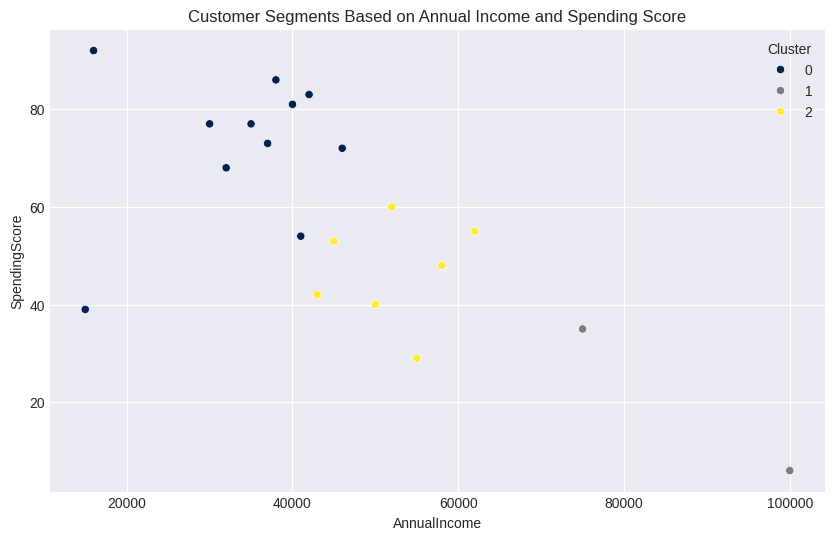

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='cividis')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()

*2. Choosing Optimal k*

In [69]:
inertia = []
k_values = range(1, 6)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

*3. Cluster Visualization*

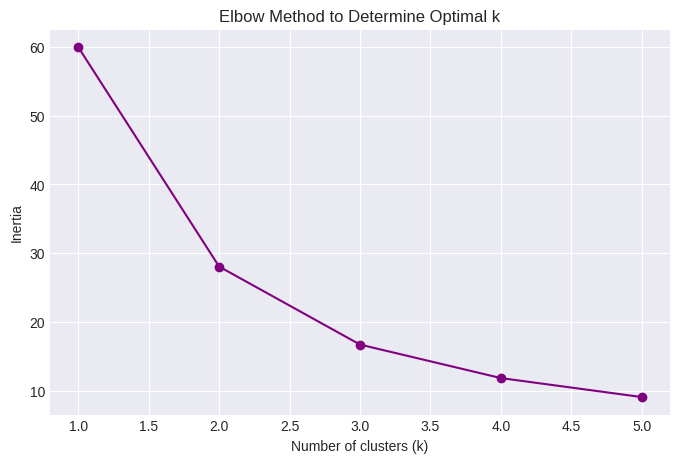

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='purple')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

### **Exercise 3: Model Evaluation**

In [13]:
from sklearn.metrics import silhouette_score

*1. Silhouette Score*

In [14]:
for k in range(2, 6):
  kmeans = KMeans(n_clusters=k, random_state=42)
  clusters = kmeans.fit_predict(df_scaled)
  silhouette_avg = silhouette_score(df_scaled, clusters)
  print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [15]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Cluster Analysis*

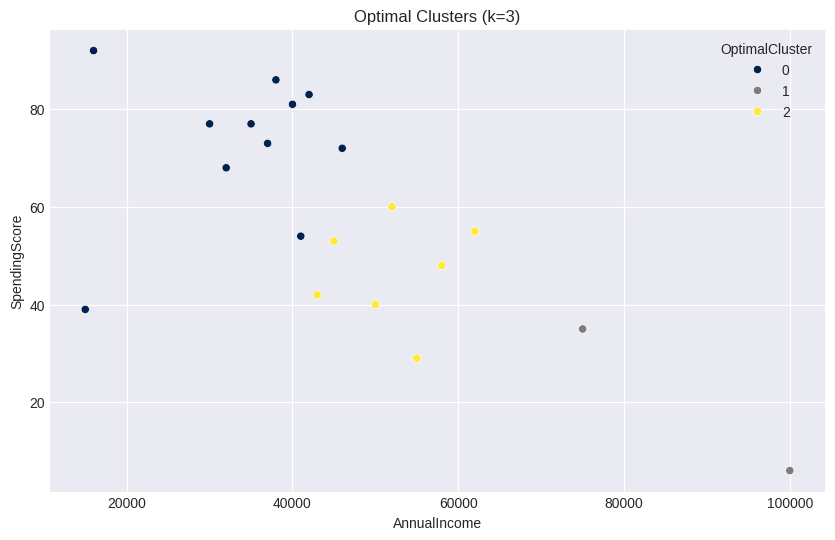

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='cividis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

*2. Cluster Analysis*

In [76]:
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster  \
OptimalCluster                                                                
0                 9.272727  30.090909  33818.181818      72.909091      0.0   
1                 6.000000  52.500000  87500.000000      20.500000      1.0   
2                13.714286  40.000000  52142.857143      46.714286      2.0   

                AnnualIncomeLog  
OptimalCluster                   
0                     10.373261  
1                     11.369096  
2                     10.854352  


### **Exercise 4: Interpretation and Reporting**

### **Cluster Interpretation**

- *Cluster 0: High-Income, Low-Spending*

Description: These are high-income individuals who spend very little. They seem to prioritize saving or investing over immediate consumption, which might reflect a cautious or conservative financial strategy.

- *Cluster 1: Young, High-Spending*

Description: This group consists of younger people who spend a lot. Their high spending on experiences and luxuries suggests they’re enjoying their early career income and investing in personal enjoyment.

- *Cluster 2: Middle-Aged, Moderate-Income*

Description: Middle-aged individuals with a balanced approach to spending. They manage their moderate income with a mix of essential purchases and discretionary spending, possibly influenced by family needs and a stable financial outlook.

#Report

***Data Exploration Process***

I began by loading the customer segmentation dataset and checking for missing values. To understand the data's characteristics, I visualized the distributions of key features—Age, Annual Income, and Spending Score—using histograms. This helped me get a clear picture of how these features are distributed. I then normalized the data using StandardScaler to ensure that each feature contributed equally to the clustering process. Normalization was crucial since K-means clustering is sensitive to the scale of the data.

***Results of K-means Clustering and Optimal Value of k***

I implemented K-means clustering with an initial assumption of three clusters and used the Elbow Method to find the optimal number of clusters. By plotting inertia values against the number of clusters, I observed a noticeable "elbow" at k=3. To further confirm, I calculated silhouette scores for k values ranging from 2 to 5, which validated that k=3 offered the best separation between clusters, as it had the highest silhouette score.

**The characteristics of each cluster:**

- The clustering analysis revealed three distinct customer segments with different spending behaviors: High-Income, Low-Spending Customers (Cluster 0).This group might benefit from marketing strategies that emphasize value and long-term benefits. Young, High-Spending Customers (Cluster 1): Engaging this segment with promotions and loyalty programs could be effective, given their high spending on lifestyle and luxury. Middle-Aged, Moderate-Income Customers (Cluster 2): This group may be more responsive to family-oriented products and services.

***Insights and Observations from the Clustering Analysis***

By interpreting these clusters, I can design targeted marketing campaigns, adjust product offerings as well as enhance customer engagement strategies to more effectively address the specific needs and preferences of each segment.



3. **Visualizations**

*Elbow Method Plot*

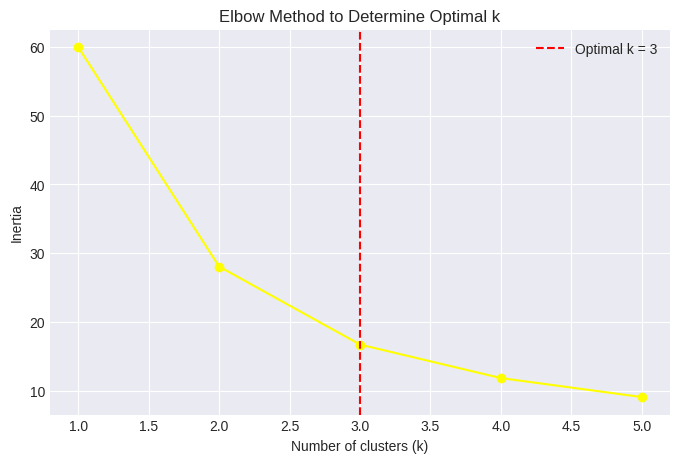

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='yellow')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 3')
plt.legend()
plt.show()

*Silhouette Scores Plot*


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

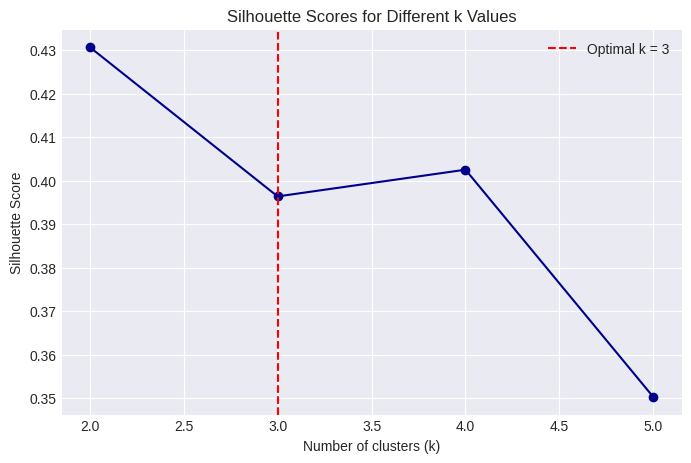

In [80]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o', color='darkblue')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 3')
plt.legend()
plt.show()

*Cluster Scatter Plot*

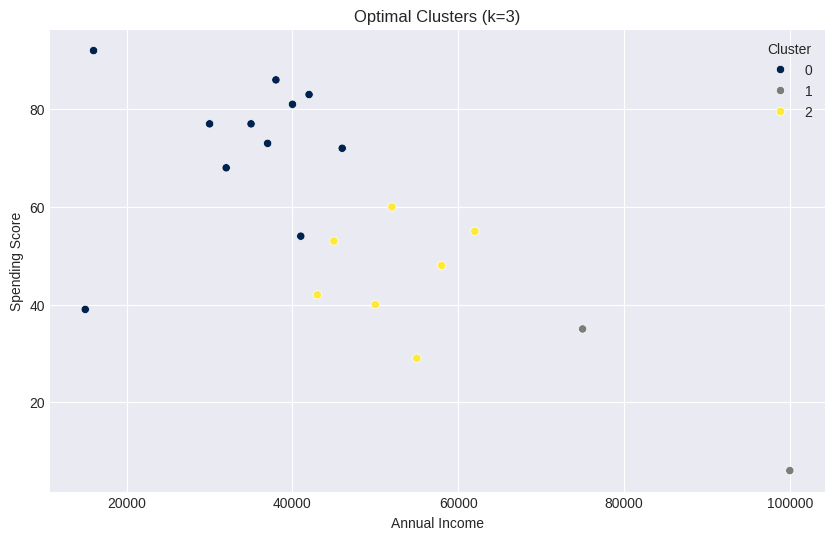

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='cividis')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()